References for this code is from https://towardsdatascience.com/religion-on-twitter-5f7b84062304

In [1]:
import nltk
import pickle5 as pickle
import carmen
from pyarrow import json
import jsonlines
import json_lines
import spacy
import tokenizer
from json2parquet import convert_json
import csv
import ijson
from nltk.tokenize import word_tokenize
import gensim

from functools import partial

import os
import pyarrow.parquet as pq

In [2]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
# %matplotlib inline"

In [3]:
from gensim.models import CoherenceModel
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim
nltk.download('punkt')

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt


# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import nltk
from nltk.corpus import stopwords

from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
import gensim
from gensim import corpora
from pprint import pprint
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

import datetime
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import webcolors
import folium
plt.rcParams.update({'figure.figsize': (30, 30), 'figure.dpi': 120})

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-5-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  # deacc=True Removes punctuations
        
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

# Join the tweet back together
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

def carmenFormat(tweet_id, text):
    tweetFormatList = []
    carmenTweet = {"tweet": {"text": text, "id": tweet_id}}
    #print(carmenTweet)
    return carmenTweet

        #for tweets in row['text'][index]:
        #tweetFormatList.append({"tweet": {"id": row[],"text": tweet}})
    #for index, row in df.iterrows():

    #return tweetFormatList

def twitterLocation(list):
    tweetList = []
    for tweet in list:
        #print("tweeeet", tweet)
        tweetLocation = resolver.resolve_tweet(tweet)
        tweetList.append(tweetLocation)
    return tweetList
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

def corpusStemmed(x):
    corpus = []
    for tweets in x['stemmed']:
        corpus.append(x['id2word_stemmed'].doc2bow(tweets))
    
    return corpus

def createLDAModel(x):
    mallet_path = '/Users/austingerner/mallet/bin/mallet' # update this path
    ldaMalletModel = gensim.models.wrappers.LdaMallet(mallet_path, corpus=x['hashtag_text'], num_topics=5, id2word=x['hashtags'])

    #for tweets in range(len(x)):
     #print("x", x['corpus_stemmed'][tweets], tweets, x['hashtags'][tweets])
      #ldaMalletModel = gensim.models.wrappers.LdaMallet(mallet_path, corpus=x['corpus_stemmed'][tweets], num_topics=5, id2word=x['id2word_stemmed'][tweets])
       # ldaMalletModel.save("{}-{}.txt".format(tweets, x['hashtags'][tweets]))
    return ldaMalletModel


def lemmatiziation(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent))
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     print("tweets_out", tweets_out)
    return tweets_out

def applyLemminzation(x):
#     print("x", x)
    tweet_list = pd.Series(lemmatiziation(x, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))
    print("tweet_list", tweet_list)

    return tweet_list

def applyStemmer(x):
    for tweets in x:
#         print(tweets, "tweets")
        for tweet in tweets:
            stemmer.stem(tweet)
    print("Stemmed", x, tweets)
    return x
def stemmerCorporaDictionary(x):
    corpora.Dictionary(x)

    print("corporadict", x)
    return x
        #[stemmer.stem(y) for y in x]
# def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     tweets_out = []
#     for sent in tweets:
#         print("sent", sent)
#         doc = nlp(" ".join(sent)) 
#         tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return tweets_out
# Initialize spacy 'en' model, keeping only tagger component
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
# Lemmatization keeping only noun, adj, vb, adv


# Data Exploration & Geolocation Tagging

In [116]:
data_path = '/Users/austingerner/Documents/gw/capstone/raw-data/november-tweets.parquet'

tweets_data_raw_df = pq.read_table(data_path).to_pandas()
#%%

tweets_data_df = tweets_data_raw_df.copy()
tweets_data_df['text'] = tweets_data_df['text'].apply(str)
tweets_data_df.drop_duplicates(subset=['text'], keep='first', inplace=True)

count = tweets_data_df['text'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

In [118]:
print("Total number of words:", count.sum(), "words")

Total number of words: 21507777 words


In [119]:
print("Mean number of words per tweet:", round(count.mean(),2), "words")

Mean number of words per tweet: 16.84 words


In [120]:
tweets_data_df["tweet_length"] = tweets_data_df["text"].str.len()
print("Total length of the dataset is:", tweets_data_df.tweet_length.sum(), "characters")

Total length of the dataset is: 163527790 characters


In [121]:
print("Mean Length of a tweet is:", round(tweets_data_df.tweet_length.mean(),0), "characters")
tweets_data_df = tweets_data_df.drop(['tweet_length'], axis=1)

Mean Length of a tweet is: 128.0 characters


In [122]:
tweets_data_df['tidy_tweet'] = np.vectorize(remove_users)(tweets_data_df['text'], "@ [\w]*", "@[\w]*")
tweets_data_df['tidy_tweet'] = tweets_data_df['tidy_tweet'].str.lower()

tweets_data_df['tidy_tweet'] = np.vectorize(remove_links)(tweets_data_df['tidy_tweet'])
tweets_data_df['tidy_tweet'] = tweets_data_df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

tweets_data_df['tidy_tweet'] = tweets_data_df['tidy_tweet'].str.replace("'", "")

tweets_data_df['tidy_tweet'] = tweets_data_df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

tweets_data_df['tidy_tweet_tokens'] = list(tokenize(tweets_data_df['tidy_tweet']))


# Prepare Stop Words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'twitter', 'pic','twitt'])


tweets_data_df['tokens_no_stop'] = remove_stopwords(tweets_data_df['tidy_tweet_tokens'])
tweets_data_df['length'] = tweets_data_df['tokens_no_stop'].apply(len)
tweets_data_df = tweets_data_df.drop(tweets_data_df[tweets_data_df['length']<3].index)
tweets_data_df = tweets_data_df.drop(['length'], axis=1)
# tweets_data_df.head()

In [123]:
# Get names of indexes for which column Age has value 30
indexNames = tweets_data_df[tweets_data_df['lang'] != 'en'].index
# Delete these row indexes from dataFrame
tweets_data_df.drop(indexNames , inplace=True)

In [124]:
tweets_data_df['no_stop_joined'] = tweets_data_df.apply(rejoin_words, axis=1)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


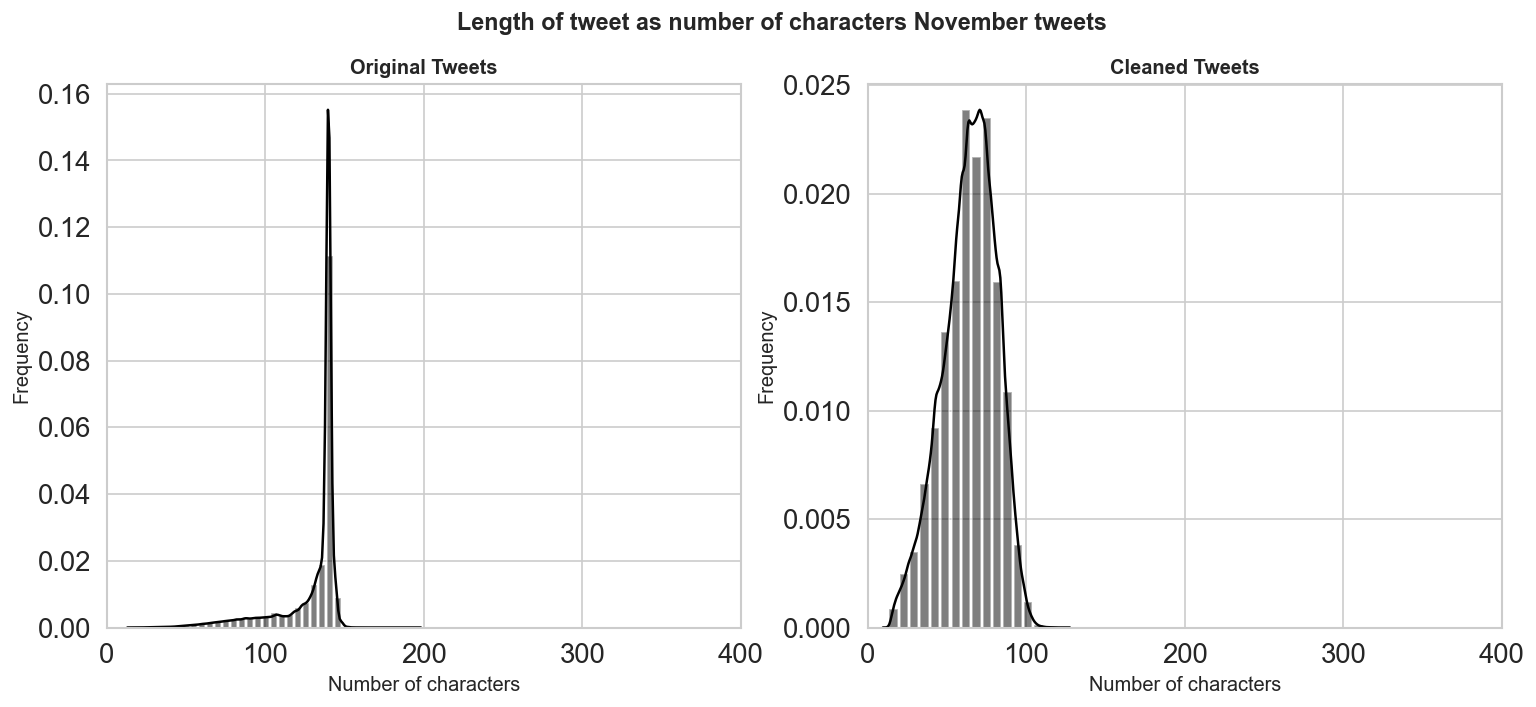

In [125]:
tweets_data_df["tweet_length"] = tweets_data_df["text"].str.len()
tweets_data_df["cleaned_tweet_length"] = tweets_data_df["no_stop_joined"].str.len()
tweets_data_df_lengths = tweets_data_df[['tweet_length', 'cleaned_tweet_length']]


x1 = tweets_data_df_lengths.tweet_length
x2 = tweets_data_df_lengths.cleaned_tweet_length
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of characters November tweets', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x1, color="black", label="No. Words", bins=35, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of characters", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="black", label="No. Words", bins=17, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of characters", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

plt.show()


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


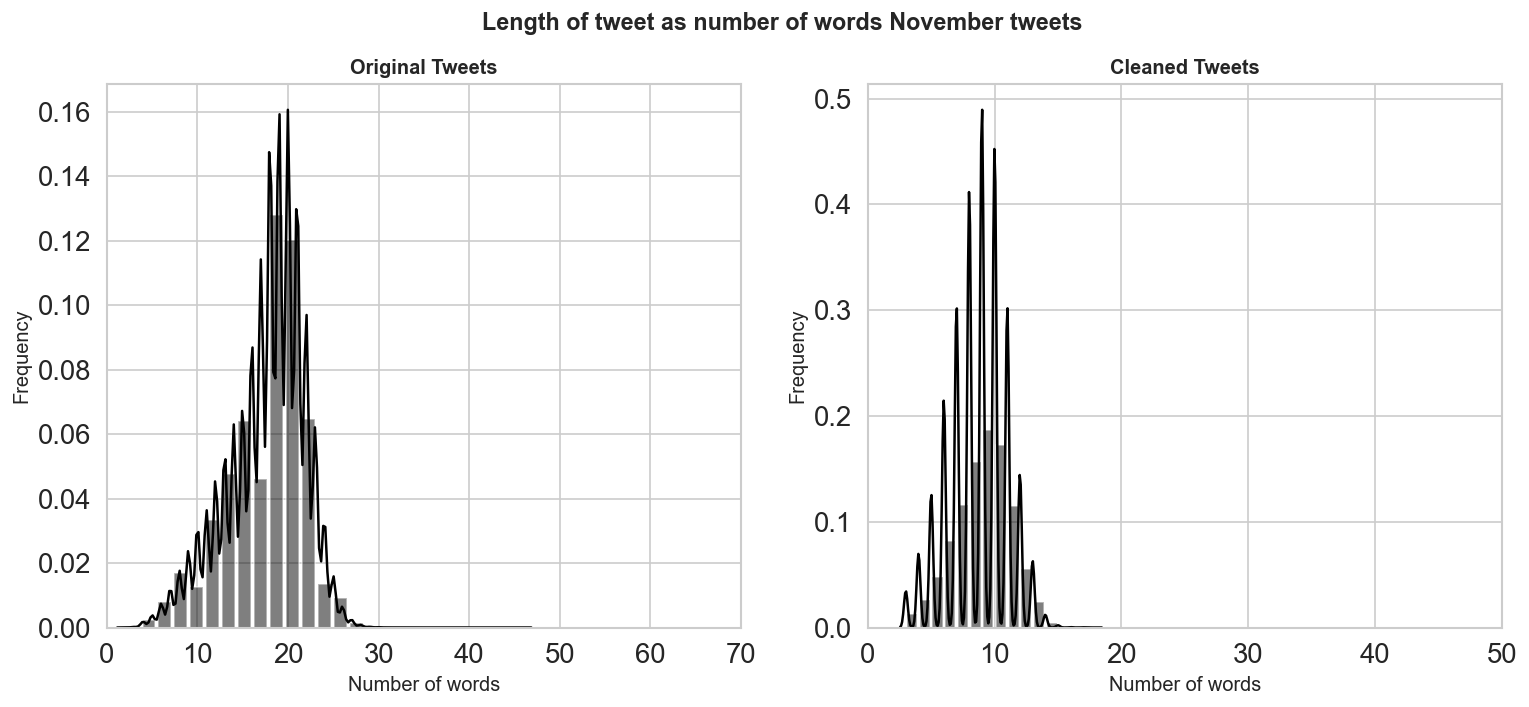

In [126]:
tweets_data_df["tweet_words"] = tweets_data_df['text'].str.split().str.len()
tweets_data_df["cleaned_tweet_words"] = tweets_data_df["no_stop_joined"].str.split().str.len()
tweets_data_df_lengths = tweets_data_df[['tweet_words', 'cleaned_tweet_words']]

x_1 = tweets_data_df_lengths.tweet_words
x_2 = tweets_data_df_lengths.cleaned_tweet_words
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of words November tweets', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x_1, color="black", label="No. Words", bins=25, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,70])



# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x_2, color="black", label="No. Words", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,50])

plt.show()


In [ ]:
tweets_data_df = tweets_data_df.drop(['tweet_length', 'cleaned_tweet_length', 'tweet_words', 'cleaned_tweet_words'], axis=1)

word_freq = pd.Series(np.concatenate([x.split() for x in tweets_data_df.no_stop_joined])).value_counts()
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

label = word_df['word'].head(25)
freq = word_df['freq'].head(25)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(15,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()